In [1]:
import numpy as np
import skfuzzy
from skfuzzy import control
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Input Variables
Trad = control.Antecedent(np.arange(0, 169, 0.1), 'Trad')
IF = control.Antecedent(np.arange(-0.2, 0.16, 0.001), 'IF')
DBSCAN = control.Antecedent(np.arange(-1, 0.1, 0.01), 'DBSCAN')
LOF = control.Antecedent(np.arange(-4.5, 0, 0.01), 'LOF')
OCSVM = control.Antecedent(np.arange(1, 13, 0.1), 'OCSVM')
ABOD = control.Antecedent(np.arange(0, 0.05, 0.0001), 'ABOD')
Sample = control.Consequent(np.arange(-30, 50, 0.1), 'Final Score')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\Mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


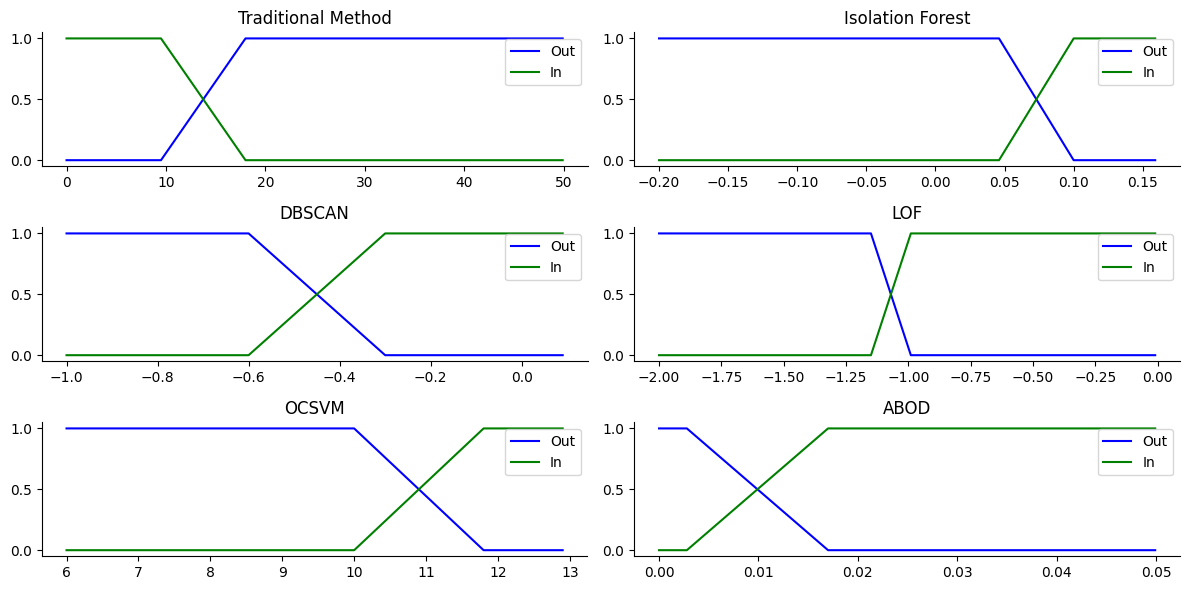

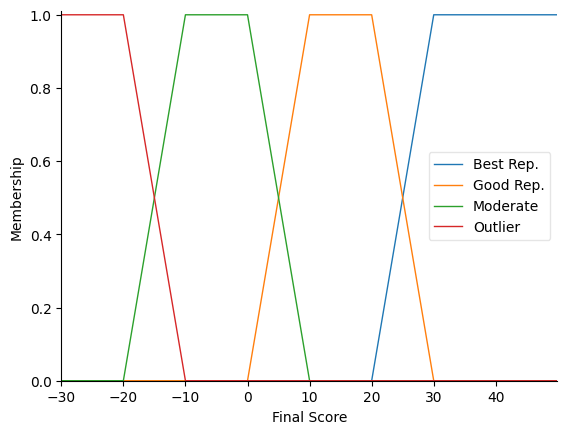

In [5]:
#membership functions (trapezoidal)
Trad['In']    = skfuzzy.trapmf(Trad.universe, [0, 0, 9.5, 18])
Trad['Out']   = skfuzzy.trapmf(Trad.universe, [9.5, 18, 169, 169])
IF['Out']     = skfuzzy.trapmf(IF.universe, [-0.2, -0.2, 0.046, 0.1])
IF['In']      = skfuzzy.trapmf(IF.universe, [0.046, 0.1, 0.16, 0.16])
DBSCAN['Out'] = skfuzzy.trapmf(DBSCAN.universe, [-1, -1, -0.6, -0.3])
DBSCAN['In']  = skfuzzy.trapmf(DBSCAN.universe, [-0.6, -0.3, 0.1, 0.1])
LOF['Out']    = skfuzzy.trapmf(LOF.universe, [-4.5, -4.5, -1.15, -0.99])
LOF['In']     = skfuzzy.trapmf(LOF.universe, [-1.15, -0.99, 0, 0])
OCSVM['Out']  = skfuzzy.trapmf(OCSVM.universe, [1, 1, 10, 11.8])
OCSVM['In']   = skfuzzy.trapmf(OCSVM.universe, [10, 11.8, 13, 13])
ABOD['Out']   = skfuzzy.trapmf(ABOD.universe, [0, 0, 0.0028, 0.017])
ABOD['In']    = skfuzzy.trapmf(ABOD.universe, [0.0028, 0.017, 0.05, 0.05])

Sample['Best Rep.'] = skfuzzy.trapmf(Sample.universe, [20, 30, 50, 50])
Sample['Good Rep.'] = skfuzzy.trapmf(Sample.universe, [0, 10, 20, 30])
Sample['Moderate']  = skfuzzy.trapmf(Sample.universe, [-20, -10, 0, 10])
Sample['Outlier']   = skfuzzy.trapmf(Sample.universe, [-30, -30, -20, -10])

def fuzzyplotter(ax, x, y1, y2, Title):
    ax.plot(x, skfuzzy.trapmf(x, y1), 'b', linewidth=1.5, label='Out')
    ax.plot(x, skfuzzy.trapmf(x, y2), 'g', linewidth=1.5, label='In')
    ax.set_title(Title)
    ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
fig, (ax) = plt.subplots(nrows=3, ncols = 2, figsize=(12, 6))   
fuzzyplotter(ax[0,0], np.arange(0, 50, 0.1), [9.5, 18, 50, 50], [0, 0, 9.5, 18], 'Traditional Method')
fuzzyplotter(ax[0,1], np.arange(-0.2, 0.16, 0.001), [-0.2, -0.2, 0.046, 0.1],[0.046, 0.1, 0.16, 0.16], 'Isolation Forest')
fuzzyplotter(ax[1,0], np.arange(-1, 0.1, 0.01), [-1, -1, -0.6, -0.3], [-0.6, -0.3, 0.1, 0.1], 'DBSCAN')
fuzzyplotter(ax[1,1], np.arange(-2, 0, 0.01), [-2, -2, -1.15, -0.99], [-1.15, -0.99, 0, 0], 'LOF')
fuzzyplotter(ax[2,0], np.arange(6, 13, 0.1), [6, 6, 10, 11.8], [10, 11.8, 13, 13], 'OCSVM')
fuzzyplotter(ax[2,1], np.arange(0, 0.05, 0.0001), [0, 0, 0.0028, 0.017], [0.0028, 0.017, 0.05, 0.05], 'ABOD')

plt.tight_layout() 
plt.savefig('Fig9.eps', bbox_inches = 'tight') 
plt.savefig('Fig9.png', dpi=600, bbox_inches = 'tight') 

Sample.view()



In [4]:
# Defining Rule
T = [Trad['In'], Trad['Out']]
I = [IF['In'], IF['Out']]
D = [DBSCAN['In'], DBSCAN['Out']]
L = [LOF['In'], LOF['Out']]
O = [OCSVM['In'], OCSVM['Out']]
A = [ABOD['In'], ABOD['Out']]
counter = 0
R = []
for i in T:
    for j in I:
        for k in D:
            for l in L:
                for m in O:
                    for n in A:
                        R.append(i & j & k & l & m & n)
                        #print(counter, i & j & k & l & m & n)
                        counter += 1


rule1 = control.Rule(R[0] , Sample['Best Rep.'])
rule2 = control.Rule(R[1]  | R[2] | R[4] | R[8] | R[16] | R[32], Sample['Good Rep.'])
rule3 = control.Rule(R[3] |R[5] |R[6] |R[9] |R[10] |R[12] |R[17] | R[18] | R[20] | R[24] | R[33] | R[34] | R[36] | R[40] | R[48] , Sample['Moderate'])
rule4 = control.Rule(R[11] |R[13] |R[14] |R[19] |R[21] |R[22] |R[41] |R[42] |R[44] |R[7] |R[25] |R[26] |R[28] |R[35] |R[37] |R[38] |R[49] |R[50] |R[52] |R[56] , Sample['Moderate'])
rule5 = control.Rule(R[15] |R[23] |R[27] |R[29] |R[30] |R[39] |R[43] |R[45] |R[46] |R[51] |R[53] |R[54] |R[57] |R[58] |R[60] , Sample['Outlier'])
rule6 = control.Rule(R[62] | R[61] | R[59] | R[55]|R[47]|R[31],Sample['Outlier'])
rule7 = control.Rule(R[63] , Sample['Outlier'])


Rules =control.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
Outlier = control.ControlSystemSimulation(Rules)

In [94]:
#Inputs
data = pd.read_excel(r'C:\Users\Mehdi\Desktop\SOutput.xlsx')

def TakingValues(AllData):
    [a, b, c, d, e, f] = AllData
    Outlier.input['Trad']   = a
    Outlier.input['IF']     = b
    Outlier.input['DBSCAN'] = c
    Outlier.input['LOF']    = d
    Outlier.input['OCSVM']  = e
    Outlier.input['ABOD']   = f
    Outlier.compute()
    print(Outlier.output['Final Score'])
    #Sample.view(sim=Outlier)
   
for i in range(0,55):
    TakingValues(data.iloc[i, :].to_numpy())

-21.2657448439745
-22.167551062995674
-13.241469607446199
-22.22222222222223
-14.077285884585656
-22.22222222222223
-22.22222222222223
-22.22222222222223
-6.628516639435027
-13.78175334201911
-5.915459948354412
-21.68566730068878
-21.98617508800778
-22.22222222222223
-8.285577380149263
-17.056426080042648
3.1387408809928297
0.7649204071064659
12.97685945093185
-0.49044861303345155
6.048550045602982
16.408154765091115
9.276974347626782
25.30535159374477
-10.121885455991457
-0.39238434455805304
13.919428393519878
12.503653438047246
-17.81516526057591
22.25152696197763
18.377510057697002
10.653980755845197
-9.590009169282983
-18.417604666034897
-6.588621610322807
17.365842072763442
26.28840909193848
33.31054604667277
21.60524714043231
14.99589149250435
7.6062919130520505
8.876127776013178
10.734689810944369
-11.543005649360559
15.000000000000016
15.000000000000016
4.872392971980496
8.417318902614623
4.8665653583498765
19.572621577485027
4.535863272751762
14.999999999995124
21.179720646096